In [1]:
# Importamos pandas
import pandas as pd

#Creamos la ruta de temps
ruta_temps = './datos/temps.csv'

#Leemos el archivo temps.csv
temps = pd.read_csv(ruta_temps)

# Mostramos los primeros 5 registros
print(temps.head())


   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  


In [2]:
# Obtener un resumen estadístico de los datos
resumen = temps.describe()

# Imprimir el resumen
print(resumen)



         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12.120542   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000  117.000000  117.000000   77.400000   

           actual  forecast_noaa  forecast_acc  forecast_under      friend  
count  348.000000     348.000000    348.000000      348.000000  348.000000  
mean    62.543103      57.238506     62.373563       59.772989   60.034483  
std     11.794146      10.605746     10.549381       10.705256   15.626179 

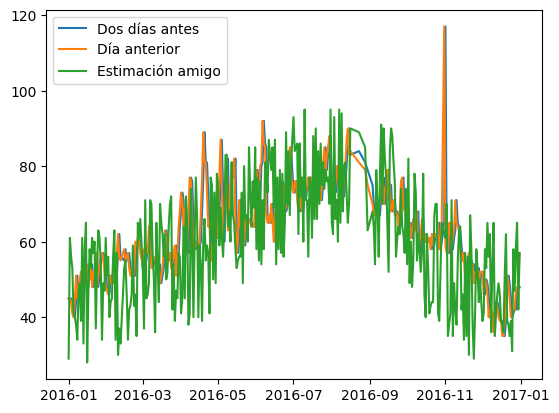

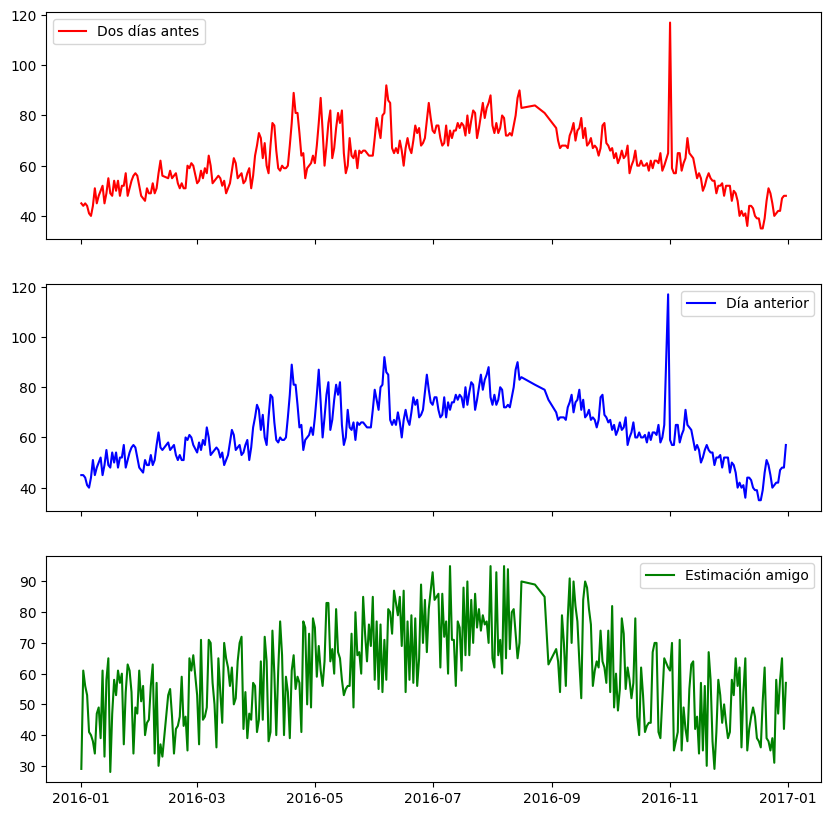

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear una columna de fecha a partir de las columnas 'year', 'month' y 'day'
temps['Fecha'] = pd.to_datetime(temps[['year', 'month', 'day']])

# Crear una figura y un conjunto de subgráficos
fig, ax = plt.subplots()

# Dibujar las temperaturas de los dos días anteriores
ax.plot(temps['Fecha'], temps['temp_2'], label='Dos días antes')
ax.plot(temps['Fecha'], temps['temp_1'], label='Día anterior')

# Dibujar la estimación del amigo
ax.plot(temps['Fecha'], temps['friend'], label='Estimación amigo')

# Añadir una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

# eliminamos la columna fecha
temps = temps.drop('Fecha', axis=1)


# Crear una columna de fecha a partir de las columnas 'year', 'month' y 'day'
temps['Fecha'] = pd.to_datetime(temps[['year', 'month', 'day']])

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(3, sharex=True, figsize=(10, 10))

# Dibujar las temperaturas de los dos días anteriores en subgráficos separados
axs[0].plot(temps['Fecha'], temps['temp_2'], color='red', label='Dos días antes')
axs[1].plot(temps['Fecha'], temps['temp_1'], color='blue', label='Día anterior')

# Dibujar la estimación del amigo en un subgráfico separado
axs[2].plot(temps['Fecha'], temps['friend'], color='green', label='Estimación amigo')

# Añadir una leyenda a cada subgráfico
for ax in axs:
    ax.legend()

# Mostrar el gráfico
plt.show()

# eliminamos la columna fecha
temps = temps.drop('Fecha', axis=1)

La línea verde(estimación amigo) tiene más oscilaciones y no sigue un patrón claro.
Hay puntos anómalos en varios momentos, especialmente alrededor de noviembre de 2016.
Esto sugiere que la estimación proporcionada por el amigo puede no ser precisa o confiable.
Es importante investigar más a fondo para comprender por qué se producen estas anomalías y si afectan significativamente el rendimiento general del modelo.
En resumen, la estimación del amigo parece menos estable y más propensa a errores en comparación con las otras dos fuentes de datos.

In [4]:
import pandas as pd

# Supongamos que 'dias_semana' es tu columna con los días de la semana
dummies = pd.get_dummies(temps['week'], prefix='week')

# Ahora 'dias_dummies' es un DataFrame con una columna para cada día de la semana,
# donde 1 indica que el día de la semana es ese día y 0 indica que no lo es.

# Para añadir estas nuevas columnas a tu DataFrame original, puedes usar la función concat():
temps = pd.concat([temps, dummies], axis=1)

# Y finalmente, puedes eliminar la columna original 'dias_semana' si ya no la necesitas:
temps = temps.drop('week', axis=1)

# Convertir las columnas de booleanos a enteros
for col in ['week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed']:
    temps[col] = temps[col].astype(int)

# Mostrar las primeras filas del DataFrame
print(temps.head())

# Mostrar las primeras filas del DataFrame
print(temps.head()) 



   year  month  day  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1      45      45     45.6      45             43   
1  2016      1    2      44      45     45.7      44             41   
2  2016      1    3      45      44     45.8      41             43   
3  2016      1    4      44      41     45.9      40             44   
4  2016      1    5      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  week_Fri  week_Mon  week_Sat  \
0            50              44      29         1         0         0   
1            50              44      61         0         0         1   
2            46              47      56         0         0         0   
3            48              46      53         0         1         0   
4            46              46      41         0         0         0   

   week_Sun  week_Thurs  week_Tues  week_Wed  
0         0           0          0         0  
1         0           0          0      

In [5]:
# Definir la variable respuesta
Y = temps['actual'].values

# Definir los predictores
X = temps.drop('actual', axis=1).values

# Mostrar las primeras filas de Y
print("Primeras filas de Y:")
print(Y[:5])

# Mostrar las primeras filas de X
print("\nPrimeras filas de X:")
print(X[:5])

Primeras filas de Y:
[45 44 41 40 44]

Primeras filas de X:
[[2.016e+03 1.000e+00 1.000e+00 4.500e+01 4.500e+01 4.560e+01 4.300e+01
  5.000e+01 4.400e+01 2.900e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 2.000e+00 4.400e+01 4.500e+01 4.570e+01 4.100e+01
  5.000e+01 4.400e+01 6.100e+01 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 3.000e+00 4.500e+01 4.400e+01 4.580e+01 4.300e+01
  4.600e+01 4.700e+01 5.600e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 4.000e+00 4.400e+01 4.100e+01 4.590e+01 4.400e+01
  4.800e+01 4.600e+01 5.300e+01 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 5.000e+00 4.100e+01 4.000e+01 4.600e+01 4.600e+01
  4.600e+01 4.600e+01 4.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00]]


In [6]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:")
print(X_train.shape, Y_train.shape)
print("\nDimensiones del conjunto de prueba:")
print(X_test.shape, Y_test.shape)

Dimensiones del conjunto de entrenamiento:
(261, 17) (261,)

Dimensiones del conjunto de prueba:
(87, 17) (87,)


In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Calcular la temperatura máxima promedio
average_max_temp = np.mean(Y_train)

# Crear un array con la temperatura máxima promedio para todas las predicciones
baseline_preds = np.full((len(Y_test),), average_max_temp)

# Calcular el MAE de la línea de base
baseline_error = mean_absolute_error(Y_test, baseline_preds)

# Imprimir el MAE de la línea de base
print(f"El error absoluto medio de la línea de base es {baseline_error}")




El error absoluto medio de la línea de base es 9.581758928964636


In [8]:

from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Convertir X_train y X_test a DataFrames de pandas
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Seleccionar solo las columnas categóricas
cat_columns = X_train.select_dtypes(include=['object']).columns

# Realizar la codificación one-hot de las columnas categóricas
X_train = pd.get_dummies(X_train, columns=cat_columns)
X_test = pd.get_dummies(X_test, columns=cat_columns)

# Asegurarse de que ambos conjuntos tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Rellenar los valores faltantes en X_test con ceros
X_test = X_test.fillna(0)

# Crear el modelo de bosque aleatorio
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [9]:
# Generar las predicciones
Y_pred = rf.predict(X_test)

# Imprimir las predicciones
print(Y_pred)

[69.857 61.319 51.891 61.321 66.463 70.162 78.848 75.786 62.121 74.078
 63.647 72.176 38.472 62.433 71.594 56.012 60.943 56.995 56.748 76.113
 63.758 54.401 66.493 62.468 58.786 53.032 66.769 46.448 62.122 80.176
 73.833 64.313 55.188 81.972 74.178 61.695 53.636 51.424 68.929 42.452
 70.385 57.373 76.172 42.396 61.098 74.08  52.745 81.369 53.325 42.487
 46.507 42.144 64.17  65.709 74.13  61.339 55.177 59.945 54.651 59.664
 65.491 50.052 60.849 70.188 60.062 59.236 71.743 69.796 76.83  41.32
 76.868 56.783 60.378 50.519 54.426 64.003 43.711 74.354 47.306 52.326
 53.526 68.21  73.607 72.658 63.243 57.175 46.04 ]


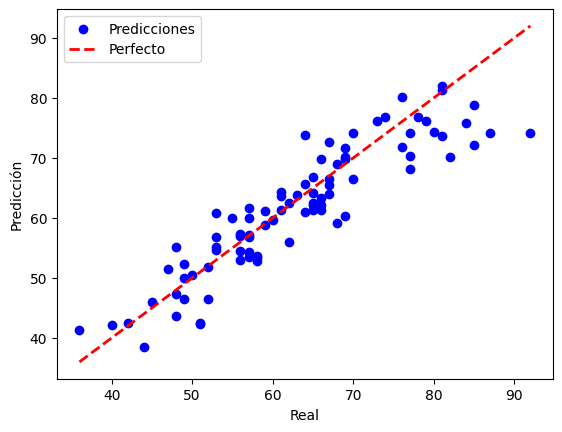

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una gráfica de dispersión para las predicciones frente a los valores reales
plt.scatter(Y_test, Y_pred, color='blue', label='Predicciones')

# Crear la línea de predicciones perfectas
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Perfecto')

# Etiquetas de los ejes
plt.xlabel('Real')
plt.ylabel('Predicción')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

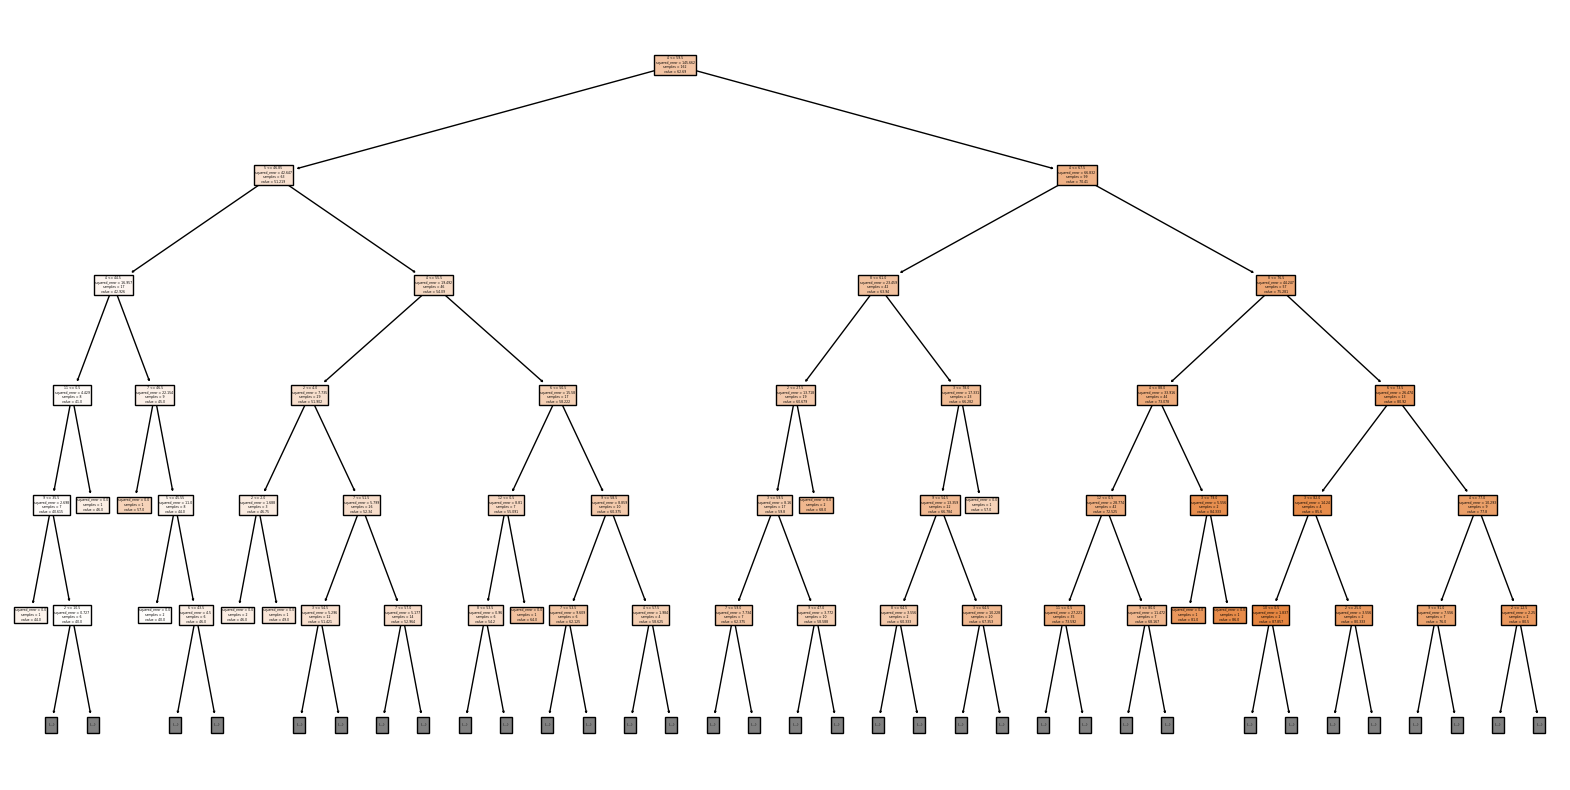

In [11]:
from sklearn.tree import plot_tree

# Seleccionar un árbol del bosque aleatorio
estimator = rf.estimators_[5]

# Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, feature_names=X_train.columns, max_depth=5)
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hacer predicciones en el conjunto de prueba
Y_pred = rf.predict(X_test)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

# Calcular el error cuadrado medio (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calcular el error cuadrado medio raíz (RMSE)
rmse = np.sqrt(mse)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(Y_test, Y_pred)

# Imprimir las métricas de manera más amigable para el usuario
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrado Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrado Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Absoluto Medio (MAE): 3.87
Error Cuadrado Medio (MSE): 26.03
Raíz del Error Cuadrado Medio (RMSE): 5.10
Coeficiente de Determinación (R^2): 0.81


Según el gráfico y las métricas proporcionadas, podemos extraer lo siguiente:

Error Absoluto Medio (MAE):
El MAE es 3.87.
Esto significa que, en promedio, las predicciones se desvían en 3.87 unidades del valor real.
Es una medida directa de la diferencia entre las predicciones y los valores reales.
Error Cuadrado Medio (MSE):
El MSE es 26.03.
Representa la media de los errores al cuadrado entre las predicciones y los valores reales.
Valores más bajos indican un mejor rendimiento del modelo.
Raíz del Error Cuadrado Medio (RMSE):
El RMSE es 5.10.
Es la raíz cuadrada del MSE y proporciona una medida de la dispersión de los errores.
Cuanto menor sea el RMSE, mejor será el modelo.
Coeficiente de Determinación (R^2):
El (R^2) es 0.81.
Indica que el modelo puede explicar aproximadamente el 81% de la variabilidad en los datos.
Un valor más cercano a 1 sugiere un mejor ajuste del modelo.
En resumen, estas métricas proporcionan información sobre la precisión y el rendimiento general del modelo. Un MAE bajo, un MSE y RMSE bajos, y un alto (R^2) son indicativos de un buen modelo predictivo.
En resumen es un modelo adecuado